In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae for high values prediction: 0.3951816340446633
mae for low values prediction: 0.41977058694382713
mae for exact values prediction: 0.6601748448993082


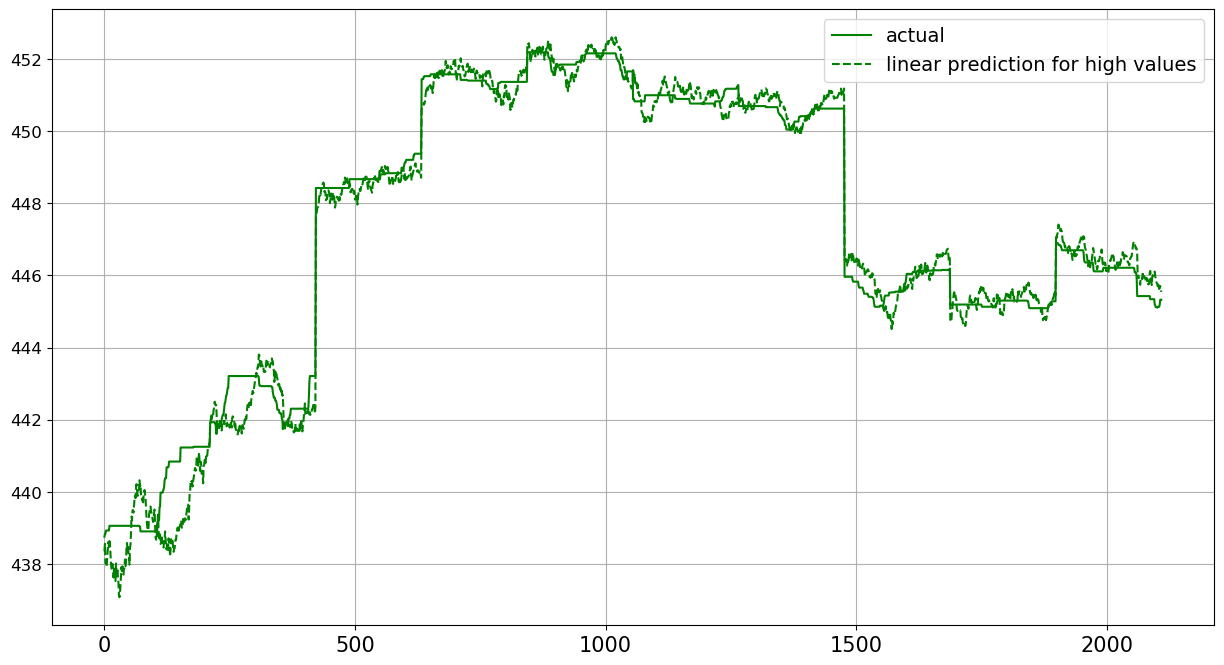

variance for high values prediction: 0.3102004287356783


In [2]:
#Linear Regression for High/Low/Return
from sklearn.linear_model import LinearRegression
X_train_raw = pd.read_csv('data/X_train.csv') 
RSI = pd.read_csv('data/RSI_windows.csv') 
#Combine RSI data with data in X_train
length = len(RSI.index)

X_train_raw = X_train_raw.loc[len(X_train_raw)-length:].reset_index(drop=True)
X_train_raw = pd.concat([X_train_raw,RSI],axis=1)
Y_train_raw = pd.read_csv('data/Y_train.csv')
Y_train_raw = Y_train_raw.loc[len(Y_train_raw)-length:].reset_index(drop=True)
#Pick the latest 10 days for testing. There are 211 data points for each day.
n = 10

X_train = X_train_raw.loc[range(0,length-211*n)]
Y_train = Y_train_raw.loc[range(0,length-211*n)]

X_test = X_train_raw.loc[range(length-211*n,length)]
Y_test = Y_train_raw.loc[range(length-211*n,length)]

linearh = LinearRegression().fit(X_train,Y_train['High'])
linearl = LinearRegression().fit(X_train,Y_train['Low'])
linearr = LinearRegression().fit(X_train,Y_train['return'])

linear_mae_high = mean_absolute_error(linearh.predict(X_test),Y_test['High'])
linear_mae_low = mean_absolute_error(linearl.predict(X_test),Y_test['Low'])
linear_mae_r = mean_absolute_error(linearr.predict(X_test),Y_test['return'])

print('mae for high values prediction:', linear_mae_high)
print('mae for low values prediction:', linear_mae_low)
print('mae for exact values prediction:', linear_mae_r)

linear_pred = linearh.predict(X_test)

plt.figure(figsize=(15,8))

plt.plot(range(211*n), Y_test['High'],'g',label='actual')
plt.plot(range(211*n), linear_pred,'g--',label='linear prediction for high values')

plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.grid()
plt.show()

print('variance for high values prediction:',(linear_pred-Y_test['High']).var(ddof=0))

In [3]:
#Save the model
#import joblib
#joblib.dump(linearh, 'linear.sav')

['linear.sav']